In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prepare
import csv

In [2]:
pd.set_option("display.max_columns", None)

In [5]:
### THIS DATAFRAME IS SPLIT BETWEEN AGGREGATED CAREER STATS AND STATS OF FIRST 30 GAMES

df = pd.read_csv('PD_merge_30.csv')
df.head(20)

,Unnamed: 0,PlayerID,Player_Name_x,Age,Height,MaxRank,Hand,Country,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Player_Name_y,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches,Future Top 30
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,0.70,605.0,0.925,605.0,0.925076,0.549180,0.656075,0.691906,0.648855,0.775000,0.750000,103720,Lleyton Hewitt,180.0,30,0.700000,0.689655,0.500000,0.614167,0.723759,0.642105,0.450000,3.633333,2.166667,True
1,1,103017,Nicolas Kiefer,22.535250,183.0,4.0,R,GER,0.57,355.0,0.937,355.0,0.936675,0.445860,0.531646,0.615721,0.456790,0.575758,0.555556,103017,Nicolas Kiefer,183.0,30,0.633333,0.583333,0.571429,0.512586,0.756438,0.631336,0.421053,6.333333,4.800000,True
2,2,103264,Mariano Puerta,26.904860,180.0,9.0,L,ARG,0.49,147.0,0.948,147.0,0.948387,0.250000,0.436508,0.400000,0.559633,0.000000,0.125000,103264,Mariano Puerta,180.0,30,0.333333,0.259259,0.090909,0.655638,0.652213,0.633094,0.423913,3.866667,2.166667,True
3,3,102845,Carlos Moya,22.546201,190.0,1.0,R,ESP,0.64,444.0,0.957,444.0,0.956897,0.500000,0.597297,0.563536,0.704280,0.500000,0.583333,102845,Carlos Moya,190.0,30,0.633333,0.545455,0.454545,0.537364,0.683812,0.648464,0.405229,4.266667,3.666667,True
4,4,102563,Thomas Johansson,27.214237,180.0,7.0,R,SWE,0.54,328.0,0.909,328.0,0.908587,0.308333,0.489933,0.550505,0.369231,0.666667,0.613636,102563,Thomas Johansson,180.0,30,0.533333,0.428571,0.375000,0.509013,0.754888,0.625571,0.410959,7.666667,3.233333,True
5,5,102856,Gustavo Kuerten,24.347707,190.0,1.0,R,BRA,0.66,278.0,0.903,278.0,0.902597,0.495238,0.619658,0.585366,0.729730,0.636364,0.576923,102856,Gustavo Kuerten,190.0,30,0.700000,0.703704,0.692308,0.547696,0.750725,0.604061,0.489177,6.633333,2.166667,True
6,6,102610,Albert Costa,27.074606,180.0,6.0,R,ESP,0.57,253.0,0.969,253.0,0.969349,0.500000,0.526316,0.430380,0.652695,0.000000,0.384615,102610,Albert Costa,180.0,30,0.633333,0.615385,0.600000,0.666297,0.709562,0.621053,0.383065,4.666667,2.200000,True
7,7,102998,Jan Michael Gambill,24.041068,190.0,14.0,R,USA,0.49,226.0,0.966,226.0,0.965812,0.282353,0.415730,0.557692,0.200000,0.562500,0.272727,102998,Jan Michael Gambill,190.0,30,0.500000,0.416667,0.200000,0.563822,0.760015,0.615000,0.392473,9.900000,2.933333,True
8,8,103151,Mariano Zabaleta,22.113621,183.0,21.0,R,ARG,0.49,257.0,0.955,257.0,0.955390,0.494118,0.467593,0.413793,0.551724,0.000000,0.250000,103151,Mariano Zabaleta,183.0,30,0.566667,0.560000,0.416667,0.555473,0.691015,0.575472,0.414847,4.200000,3.600000,True
9,9,102854,Sjeng Schalken,26.633812,193.0,11.0,R,NED,0.56,255.0,0.917,255.0,0.917266,0.287500,0.518692,0.575342,0.476190,0.650000,0.586207,102854,Sjeng Schalken,193.0,30,0.500000,0.625000,0.250000,0.632795,0.696382,0.602190,0.458678,3.933333,3.400000,True


True     139
False     93
Name: Future Top 30, dtype: int64


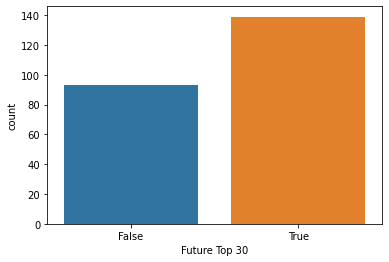

In [10]:
print(df['Future Top 30'].value_counts())
sns.countplot(x='Future Top 30', data=df);

In [11]:
df.describe()

,Unnamed: 0,PlayerID,Age,Height,MaxRank,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,122.612069,106200.581897,25.266893,185.629310,28.866379,0.497026,256.090517,0.949284,256.090517,0.949295,0.305108,0.439973,0.476048,0.468479,0.409956,0.268086,106200.581897,185.629310,30.0,0.453592,0.399734,0.275745,0.594462,0.698578,0.595330,0.395704,5.527299,3.234770
std,71.509364,8709.053041,2.876438,6.962522,24.110753,0.101347,186.055979,0.049403,186.055979,0.049405,0.130134,0.118599,0.124512,0.153484,0.215691,0.289042,8709.053041,6.962522,0.0,0.102572,0.118473,0.161676,0.041611,0.038431,0.040436,0.046450,2.973999,0.939941
min,0.000000,100644.000000,19.178645,168.000000,1.000000,0.280000,33.000000,0.701000,33.000000,0.701299,0.045455,0.176471,0.071429,0.000000,0.000000,0.000000,100644.000000,168.000000,30.0,0.233333,0.100000,0.000000,0.460628,0.601868,0.493671,0.211679,0.533333,1.166667
25%,59.750000,103451.500000,23.121150,180.750000,9.000000,0.430000,100.500000,0.930750,100.500000,0.930338,0.214048,0.356567,0.397682,0.375000,0.272727,0.000000,103451.500000,180.750000,30.0,0.400000,0.318182,0.166667,0.565134,0.672066,0.566986,0.367573,3.500000,2.566667
50%,123.500000,104378.500000,24.695414,185.000000,22.500000,0.490000,220.000000,0.961500,220.000000,0.961615,0.294118,0.427521,0.465041,0.489362,0.435340,0.207143,104378.500000,185.000000,30.0,0.450000,0.391304,0.250000,0.594353,0.695304,0.595253,0.394154,4.866667,3.066667
75%,184.250000,105380.500000,26.976044,190.000000,43.000000,0.560000,356.000000,0.983250,356.000000,0.983299,0.384066,0.515058,0.557692,0.566244,0.569581,0.500000,105380.500000,190.000000,30.0,0.500000,0.458333,0.375000,0.617803,0.723304,0.623084,0.427148,6.775000,3.741667
max,245.000000,200282.000000,33.464750,211.000000,128.000000,0.840000,1068.000000,1.000000,1068.000000,1.000000,0.756696,0.825417,0.838951,0.926230,0.874172,1.000000,200282.000000,211.000000,30.0,0.733333,0.750000,0.700000,0.747014,0.822428,0.712042,0.530387,20.133333,7.066667


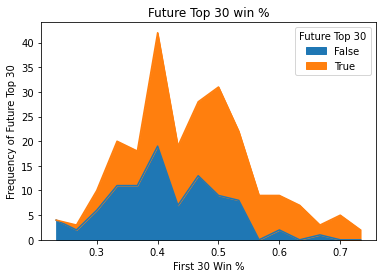

In [21]:
# Looking at the distribution of Win% of future 30 matches

pd.crosstab(df['Overall_Win%_30matches'], df['Future Top 30']).plot(kind='area')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

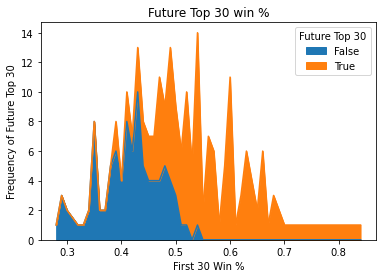

In [24]:
## Looking at players career Win% if they made it into the top 30

pd.crosstab(df['win%'], df['Future Top 30']).plot(kind='area')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

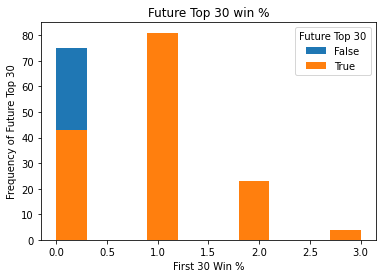

In [26]:
pd.crosstab(df['Aces/Match_30matches'], df['Future Top 30']).plot(kind='hist')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

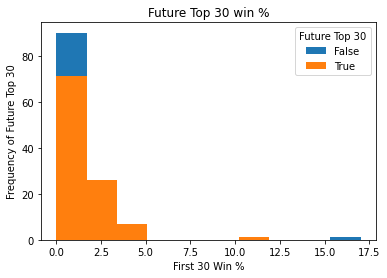

In [28]:
# continues trend (check for outlier)
pd.crosstab(df['aces_per_game'], df['Future Top 30']).plot(kind='hist')
plt.title("Future Top 30 win %")
plt.xlabel('First 30 Win %')
plt.ylabel('Frequency of Future Top 30');

In [32]:
### lets look at MaxRank == 1
df_rank_1 = df[df.MaxRank == 1]
df_rank_1

,Unnamed: 0,PlayerID,Player_Name_x,Age,Height,MaxRank,Hand,Country,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Player_Name_y,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches,Future Top 30
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,0.70,605.0,0.925,605.0,0.925076,0.549180,0.656075,0.691906,0.648855,0.775000,0.750000,103720,Lleyton Hewitt,180.0,30,0.700000,0.689655,0.500000,0.614167,0.723759,0.642105,0.450000,3.633333,2.166667,True
3,3,102845,Carlos Moya,22.546201,190.0,1.0,R,ESP,0.64,444.0,0.957,444.0,0.956897,0.500000,0.597297,0.563536,0.704280,0.500000,0.583333,102845,Carlos Moya,190.0,30,0.633333,0.545455,0.454545,0.537364,0.683812,0.648464,0.405229,4.266667,3.666667,True
5,5,102856,Gustavo Kuerten,24.347707,190.0,1.0,R,BRA,0.66,278.0,0.903,278.0,0.902597,0.495238,0.619658,0.585366,0.729730,0.636364,0.576923,102856,Gustavo Kuerten,190.0,30,0.700000,0.703704,0.692308,0.547696,0.750725,0.604061,0.489177,6.633333,2.166667,True
12,12,103498,Marat Safin,20.835044,193.0,1.0,R,RUS,0.64,453.0,0.908,453.0,0.907816,0.548023,0.610169,0.624506,0.630872,0.611111,0.737705,103498,Marat Safin,193.0,30,0.600000,0.640000,0.454545,0.499552,0.766789,0.571429,0.387097,8.366667,2.766667,True
41,42,103819,Roger Federer,22.485969,185.0,1.0,R,SUI,0.81,1068.0,0.954,1068.0,0.954424,0.735986,0.797160,0.821429,0.768293,0.874172,0.680000,103819,Roger Federer,185.0,30,0.533333,0.538462,0.375000,0.585766,0.720801,0.653465,0.414365,6.233333,3.533333,True
49,51,103507,Juan Carlos Ferrero,23.589322,183.0,1.0,R,ESP,0.65,515.0,0.948,515.0,0.948435,0.505155,0.613391,0.585903,0.727273,0.562500,0.500000,103507,Juan Carlos Ferrero,183.0,30,0.600000,0.541667,0.375000,0.618997,0.667261,0.605042,0.408730,2.166667,3.633333,True
106,113,104745,Rafael Nadal,22.228611,185.0,1.0,L,ESP,0.84,866.0,0.976,866.0,0.976325,0.756696,0.825417,0.778022,0.926230,0.754098,0.400000,104745,Rafael Nadal,185.0,30,0.600000,0.583333,0.384615,0.715050,0.679527,0.657005,0.411504,1.400000,1.800000,True
126,134,104925,Novak Djokovic,24.213552,188.0,1.0,R,SRB,0.82,779.0,0.958,779.0,0.958180,0.739229,0.814404,0.838951,0.776119,0.865672,0.727273,104925,Novak Djokovic,188.0,30,0.433333,0.400000,0.166667,0.629635,0.683401,0.597610,0.380734,4.633333,3.033333,True
136,146,104918,Andy Murray,29.503080,190.0,1.0,R,GBR,0.76,630.0,0.963,630.0,0.963303,0.650794,0.736475,0.775556,0.663793,0.797468,0.777778,104918,Andy Murray,190.0,30,0.600000,0.476190,0.461538,0.546371,0.747060,0.584906,0.432203,5.933333,3.000000,True


In [ ]:
### Fun Observations:
# Gustavo came out with 70% win rate on top 30 matches (see when he went pro, might skew data)



# Novak Djokovic came out really low in his first 30 matches at 40% of top 100 and 16% top 30
# Federer came out at 53% top 100 and 37% top 30


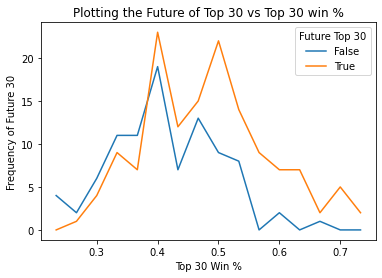

In [35]:
# shows that the first 30 matches can be widely inconsistent for predicting the future of a player

pd.crosstab(df['Overall_Win%_30matches'], df['Future Top 30']).plot()
plt.title("Plotting the Future of Top 30 vs Top 30 win %")
plt.xlabel("Top 30 Win %")
plt.ylabel("Frequency of Future 30");

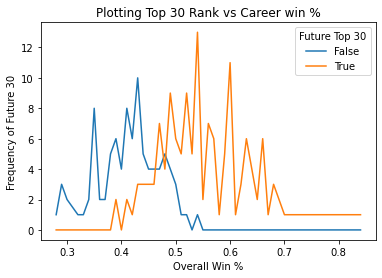

In [38]:
# makes sense that the threshold ends up being right around 50% for if you become top tier or not

pd.crosstab(df['win%'], df['Future Top 30']).plot()
plt.title("Plotting Top 30 Rank vs Career win %")
plt.xlabel("Overall Win %")
plt.ylabel("Frequency of Future 30");

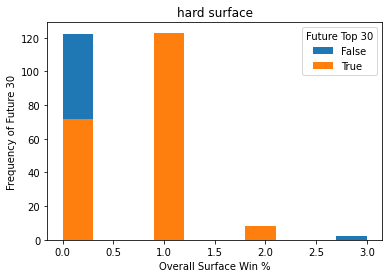

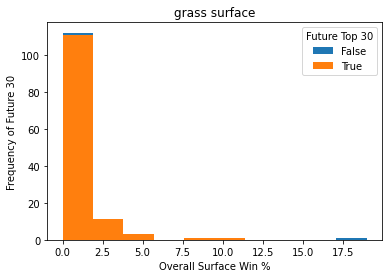

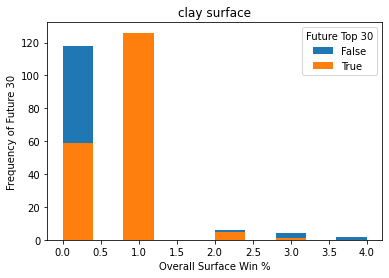

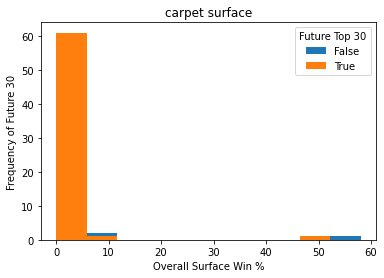

In [45]:
# this doesn't tell us much - need to still scale

pd.crosstab(df['hard_win%'], df['Future Top 30']).plot(kind='hist')
plt.title("hard surface")
plt.xlabel("Overall Surface Win %")
plt.ylabel("Frequency of Future 30");

pd.crosstab(df['grass_win%'], df['Future Top 30']).plot(kind='hist')
plt.title("grass surface")
plt.xlabel("Overall Surface Win %")
plt.ylabel("Frequency of Future 30");

pd.crosstab(df['clay_win%'], df['Future Top 30']).plot(kind='hist')
plt.title("clay surface")
plt.xlabel("Overall Surface Win %")
plt.ylabel("Frequency of Future 30");

pd.crosstab(df['carpet_win%'], df['Future Top 30']).plot(kind='hist')
plt.title("carpet surface")
plt.xlabel("Overall Surface Win %")
plt.ylabel("Frequency of Future 30");


In [53]:
### interested in top clay winners
PlayerDatabase = pd.read_csv('PlayerData.csv')
PlayerDatabase['clay_win%'].sort_values(ascending = False)

189    0.926230
230    0.776119
90     0.768293
335    0.746032
13     0.729730
         ...   
306    0.000000
206    0.000000
62     0.000000
111    0.000000
29     0.000000
Name: clay_win%, Length: 371, dtype: float64

In [ ]:
### Scale Features
### More vizs
### Modeling


In [73]:
### Pulling in 50
fifty = pd.read_csv('ATP_PlayersFirst_50Matches.csv')
fifty

,Unnamed: 0,PlayerID,Player_Name,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/Match,DF/Match,Future Top 30
0,103720,103720,Lleyton Hewitt,180.0,50,0.74,0.717391,0.600000,0.588766,0.727747,0.636054,0.486618,3.74,2.48,True
1,103017,103017,Nicolas Kiefer,183.0,50,0.64,0.595238,0.541667,0.508294,0.756929,0.657825,0.421053,6.36,4.60,True
2,103264,103264,Mariano Puerta,180.0,50,0.50,0.441860,0.142857,0.680814,0.685495,0.627168,0.428571,3.42,1.76,True
3,102845,102845,Carlos Moya,190.0,50,0.64,0.600000,0.500000,0.538697,0.703165,0.641553,0.405462,4.70,3.46,True
4,102856,102856,Gustavo Kuerten,190.0,50,0.68,0.651163,0.500000,0.545480,0.779010,0.622517,0.483333,8.72,2.40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,133430,133430,Denis Shapovalov,185.0,50,0.58,0.581395,0.500000,0.574675,0.746102,0.655488,0.393220,7.88,5.26,True
193,200282,200282,Alex De Minaur,183.0,50,0.56,0.560976,0.153846,0.622900,0.697952,0.619423,0.377171,4.50,3.18,True
194,126774,126774,Stefanos Tsitsipas,193.0,50,0.54,0.476190,0.454545,0.580813,0.764461,0.612167,0.392361,7.96,2.78,True
195,126610,126610,Matteo Berrettini,196.0,50,0.56,0.526316,0.384615,0.614138,0.772089,0.642857,0.363934,7.92,2.10,True


In [75]:
PlayerDatabase = pd.read_csv('PlayerData.csv')
PlayerDatabase

,Unnamed: 0,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.773470,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775000,15.0,5.0,20.0,0.750000
1,1,102158,Patrick Rafter,26.477755,185.0,2.0,R,AUS,97.0,44.0,141.0,0.69,292.0,637.0,929.0,6.589,0.637279,0.653328,0.700358,0.795185,61.0,342.0,403.0,2.858156,35.0,25.0,75.0,38.0,60.0,113.0,0.583333,0.663717,47.0,25.0,72.0,0.652778,14.0,11.0,25.0,0.560000,31.0,6.0,37.0,0.837838,5.0,2.0,7.0,0.714286
2,2,103017,Nicolas Kiefer,22.535250,183.0,4.0,R,GER,217.0,162.0,379.0,0.57,975.0,1514.0,2489.0,6.567,0.514047,0.537990,0.689337,0.792370,240.0,836.0,1076.0,2.839050,70.0,87.0,168.0,148.0,157.0,316.0,0.445860,0.531646,141.0,88.0,229.0,0.615721,37.0,44.0,81.0,0.456790,19.0,14.0,33.0,0.575758,20.0,16.0,36.0,0.555556
3,3,210013,Martin Damm Sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,203.0,141.0,344.0,6.745,0.546553,0.611743,0.693080,0.806999,38.0,72.0,110.0,2.156863,4.0,9.0,11.0,25.0,13.0,36.0,0.307692,0.305556,9.0,16.0,25.0,0.360000,4.0,7.0,11.0,0.363636,6.0,7.0,13.0,0.461538,0.0,0.0,0.0,0.000000
4,4,103264,Mariano Puerta,26.904860,180.0,9.0,L,ARG,76.0,79.0,155.0,0.49,272.0,273.0,545.0,3.516,0.637432,0.680268,0.613399,0.746508,93.0,272.0,365.0,2.354839,11.0,33.0,55.0,71.0,44.0,126.0,0.250000,0.436508,14.0,21.0,35.0,0.400000,61.0,48.0,109.0,0.559633,0.0,0.0,0.0,0.000000,1.0,7.0,8.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2028,200282,Alex De Minaur,20.711841,183.0,18.0,R,AUS,45.0,27.0,72.0,0.62,100.0,219.0,319.0,4.431,0.615800,0.628429,0.638539,0.775507,39.0,177.0,216.0,3.000000,6.0,12.0,37.0,22.0,18.0,59.0,0.333333,0.627119,40.0,16.0,56.0,0.714286,2.0,7.0,9.0,0.222222,3.0,4.0,7.0,0.428571,0.0,0.0,0.0,0.000000
378,2065,126774,Stefanos Tsitsipas,20.788501,193.0,6.0,R,GRE,62.0,37.0,99.0,0.63,307.0,483.0,790.0,7.980,0.584801,0.624753,0.735252,0.784889,55.0,188.0,243.0,2.454545,26.0,18.0,51.0,35.0,44.0,86.0,0.590909,0.593023,39.0,25.0,64.0,0.609375,18.0,8.0,26.0,0.692308,5.0,4.0,9.0,0.555556,0.0,0.0,0.0,0.000000
379,2078,105815,Tennys Sandgren,27.482546,188.0,41.0,R,USA,25.0,30.0,55.0,0.45,222.0,255.0,477.0,8.673,0.600247,0.633775,0.692401,0.799943,44.0,95.0,139.0,2.527273,6.0,7.0,18.0,24.0,13.0,42.0,0.461538,0.428571,13.0,13.0,26.0,0.500000,7.0,12.0,19.0,0.368421,5.0,5.0,10.0,0.500000,0.0,0.0,0.0,0.000000
380,2081,126610,Matteo Berrettini,23.581109,196.0,8.0,R,ITA,29.0,25.0,54.0,0.54,168.0,263.0,431.0,7.981,0.610410,0.628175,0.702783,0.822480,22.0,93.0,115.0,2.129630,6.0,10.0,21.0,21.0,16.0,42.0,0.375000,0.500000,9.0,13.0,22.0,0.409091,15.0,9.0,24.0,0.625000,5.0,3.0,8.0,0.625000,0.0,0.0,0.0,0.000000


In [79]:
from functools import reduce


data_frames = [fifty, PlayerDatabase]

PD_merge_50 = reduce(lambda  left,right: pd.merge(left,right,on=['PlayerID'],
                                            how='inner'), data_frames)
PD_merge_50[PD_merge_50.MaxRank == 1]


,Unnamed: 0_x,PlayerID,Player_Name_x,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/Match,DF/Match,Future Top 30,Unnamed: 0_y,Player_Name_y,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103720,103720,Lleyton Hewitt,180.0,50,0.74,0.717391,0.600000,0.588766,0.727747,0.636054,0.486618,3.74,2.48,True,0,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.773470,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775000,15.0,5.0,20.0,0.750000
3,102845,102845,Carlos Moya,190.0,50,0.64,0.600000,0.500000,0.538697,0.703165,0.641553,0.405462,4.70,3.46,True,8,Carlos Moya,22.546201,190.0,1.0,R,ESP,297.0,167.0,464.0,0.64,837.0,1714.0,2551.0,5.498,0.576697,0.587575,0.674769,0.769395,286.0,1050.0,1336.0,2.879310,80.0,80.0,221.0,149.0,160.0,370.0,0.500000,0.597297,102.0,79.0,181.0,0.563536,181.0,76.0,257.0,0.704280,7.0,7.0,14.0,0.500000,7.0,5.0,12.0,0.583333
4,102856,102856,Gustavo Kuerten,190.0,50,0.68,0.651163,0.500000,0.545480,0.779010,0.622517,0.483333,8.72,2.40,True,16,Gustavo Kuerten,24.347707,190.0,1.0,R,BRA,202.0,106.0,308.0,0.66,727.0,1709.0,2436.0,7.909,0.552564,0.556285,0.718379,0.796136,155.0,743.0,898.0,2.915584,52.0,53.0,145.0,89.0,105.0,234.0,0.495238,0.619658,72.0,51.0,123.0,0.585366,108.0,40.0,148.0,0.729730,7.0,4.0,11.0,0.636364,15.0,11.0,26.0,0.576923
11,103498,103498,Marat Safin,193.0,50,0.48,0.463415,0.461538,0.477355,0.763921,0.551429,0.378307,8.62,3.30,True,40,Marat Safin,20.835044,193.0,1.0,R,RUS,319.0,180.0,499.0,0.64,1299.0,2866.0,4165.0,8.347,0.552617,0.556719,0.707889,0.788261,284.0,1109.0,1393.0,2.791583,97.0,80.0,252.0,161.0,177.0,413.0,0.548023,0.610169,158.0,95.0,253.0,0.624506,94.0,55.0,149.0,0.630872,22.0,14.0,36.0,0.611111,45.0,16.0,61.0,0.737705
33,103819,103819,Roger Federer,185.0,50,0.48,0.439024,0.230769,0.581764,0.710819,0.643243,0.401961,6.28,3.82,True,133,Roger Federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,1541.0,6829.0,8370.0,7.480,0.597457,0.629201,0.701538,0.796579,391.0,3238.0,3629.0,3.243074,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.680000
42,103507,103507,Juan Carlos Ferrero,183.0,50,0.64,0.604651,0.625000,0.616311,0.675664,0.623377,0.398693,2.72,3.20,True,230,Juan Carlos Ferrero,23.589322,183.0,1.0,R,ESP,353.0,190.0,543.0,0.65,672.0,1426.0,2098.0,3.864,0.637765,0.640235,0.629894,0.733483,305.0,1440.0,1745.0,3.213628,98.0,96.0,284.0,179.0,194.0,463.0,0.505155,0.613391,133.0,94.0,227.0,0.585903,192.0,72.0,264.0,0.727273,18.0,14.0,32.0,0.562500,10.0,10.0,20.0,0.500000
65,104053,104053,Andy Roddick,188.0,50,0.62,0.589744,0.266667,0.595666,0.792553,0.726891,0.329513,10.82,3.34,False,471,Andy Roddick,21.196441,188.0,1.0,R,USA,430.0,151.0,581.0,0.74,1473.0,4830.0,6303.0,10.849,0.624105,0.654332,0.728889,0.820516,151.0,1250.0,1401.0,2.411360,111.0,83.0,344.0,142.0,194.0,486.0,0.572165,0.707819,303.0,100.0,403.0,0.751861,58.0,31.0,89.0,0.651685,54.0,14.0,68.0,0.794118,15.0,6.0,21.0,0.714286
94,104745,104745,Rafael Nadal,185.0,50

In [96]:
player_list = ['Roger Federer', 'Andy Roddick', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']

In [98]:
rival_50 = PD_merge_50[PD_merge_50.Player_Name_x.isin(player_list)]
rival_50

,Unnamed: 0_x,PlayerID,Player_Name_x,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/Match,DF/Match,Future Top 30,Unnamed: 0_y,Player_Name_y,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
33,103819,103819,Roger Federer,185.0,50,0.48,0.439024,0.230769,0.581764,0.710819,0.643243,0.401961,6.28,3.82,True,133,Roger Federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,1541.0,6829.0,8370.0,7.480,0.597457,0.629201,0.701538,0.796579,391.0,3238.0,3629.0,3.243074,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.680000
65,104053,104053,Andy Roddick,188.0,50,0.62,0.589744,0.266667,0.595666,0.792553,0.726891,0.329513,10.82,3.34,False,471,Andy Roddick,21.196441,188.0,1.0,R,USA,430.0,151.0,581.0,0.74,1473.0,4830.0,6303.0,10.849,0.624105,0.654332,0.728889,0.820516,151.0,1250.0,1401.0,2.411360,111.0,83.0,344.0,142.0,194.0,486.0,0.572165,0.707819,303.0,100.0,403.0,0.751861,58.0,31.0,89.0,0.651685,54.0,14.0,68.0,0.794118,15.0,6.0,21.0,0.714286
94,104745,104745,Rafael Nadal,185.0,50,0.60,0.500000,0.333333,0.710382,0.676441,0.648294,0.444724,1.46,1.80,True,756,Rafael Nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,407.0,2257.0,2664.0,3.003,0.680257,0.683340,0.637243,0.748767,265.0,3207.0,3472.0,3.914318,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417,354.0,101.0,455.0,0.778022,339.0,27.0,366.0,0.926230,46.0,15.0,61.0,0.754098,2.0,3.0,5.0,0.400000
110,104925,104925,Novak Djokovic,188.0,50,0.56,0.547619,0.380952,0.634554,0.700121,0.614583,0.419890,5.30,3.28,True,997,Novak Djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,605.0,3621.0,4226.0,5.198,0.635394,0.656273,0.653117,0.762887,246.0,2819.0,3065.0,3.769988,326.0,115.0,588.0,134.0,441.0,722.0,0.739229,0.814404,448.0,86.0,534.0,0.838951,156.0,45.0,201.0,0.776119,58.0,9.0,67.0,0.865672,8.0,3.0,11.0,0.727273
122,104918,104918,Andy Murray,190.0,50,0.56,0.470588,0.421053,0.557746,0.708827,0.601485,0.426304,5.36,2.72,True,1075,Andy Murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,937.0,3336.0,4273.0,6.534,0.559638,0.588219,0.668232,0.772850,331.0,2167.0,2498.0,3.819572,205.0,110.0,422.0,151.0,315.0,573.0,0.650794,0.736475,349.0,101.0,450.0,0.775556,77.0,39.0,116.0,0.663793,63.0,16.0,79.0,0.797468,7.0,2.0,9.0,0.777778


In [ ]:
### Roger Federer is the shortest (tied with Nadal)
### His top 100% and 30% Rank Players ratio is the worst starting of his career
### Middle in rankings for BP Save and conversation
### 

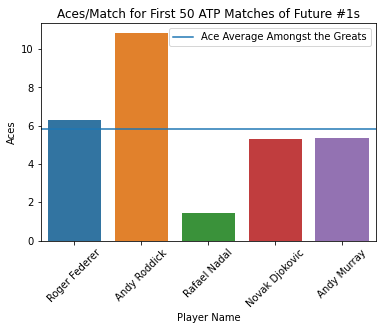

In [121]:
plt.title("Aces/Match for First 50 ATP Matches of Future #1s")
sns.barplot(x="Player_Name_x", y="Aces/Match", data=rival_50)
rate = rival_50['Aces/Match'].mean()
plt.axhline(rate, label="Ace Average Amongst the Greats")
plt.xticks(rotation = 45)
plt.xlabel('Player Name')
plt.ylabel('Aces')
plt.legend()
plt.show()

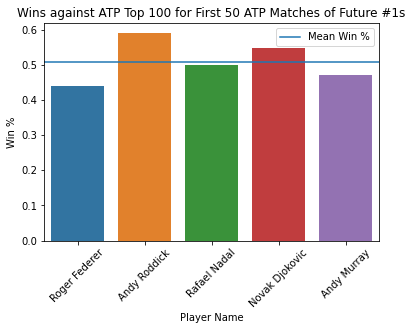

In [126]:
plt.title("Wins against ATP Top 100 for First 50 ATP Matches of Future #1s")
sns.barplot(x="Player_Name_x", y="Top 100 Win %", data=rival_50)
rate = rival_50['Top 100 Win %'].mean()
plt.axhline(rate, label="Mean Win %")
plt.xticks(rotation = 45)
plt.xlabel('Player Name')
plt.ylabel('Win %')
plt.legend()
plt.show()

In [100]:
rival_30 = df[df.Player_Name_x.isin(player_list)]
rival_30

,Unnamed: 0,PlayerID,Player_Name_x,Age,Height,MaxRank,Hand,Country,win%,ace_count,aces_per_game,breakpoint_count,breakpoints_per_game,top_30_win%,top_100_win%,hard_win%,clay_win%,grass_win%,carpet_win%,Unnamed: 0.1,Player_Name_y,Height(cm),Matches Played,Overall_Win%_30matches,Top_100_Win%_30matches,Top_30_Win%_30matches,First_Serve%_30matches,First_Serve_Win%_30matches,BPSave%_30matches,BPConv%_30matches,Aces/Match_30matches,DF/Match_30matches,Future Top 30
41,42,103819,Roger Federer,22.485969,185.0,1.0,R,SUI,0.81,1068.0,0.954,1068.0,0.954424,0.735986,0.797160,0.821429,0.768293,0.874172,0.680000,103819,Roger Federer,185.0,30,0.533333,0.538462,0.375000,0.585766,0.720801,0.653465,0.414365,6.233333,3.533333,True
106,113,104745,Rafael Nadal,22.228611,185.0,1.0,L,ESP,0.84,866.0,0.976,866.0,0.976325,0.756696,0.825417,0.778022,0.926230,0.754098,0.400000,104745,Rafael Nadal,185.0,30,0.600000,0.583333,0.384615,0.715050,0.679527,0.657005,0.411504,1.400000,1.800000,True
126,134,104925,Novak Djokovic,24.213552,188.0,1.0,R,SRB,0.82,779.0,0.958,779.0,0.958180,0.739229,0.814404,0.838951,0.776119,0.865672,0.727273,104925,Novak Djokovic,188.0,30,0.433333,0.400000,0.166667,0.629635,0.683401,0.597610,0.380734,4.633333,3.033333,True
136,146,104918,Andy Murray,29.503080,190.0,1.0,R,GBR,0.76,630.0,0.963,630.0,0.963303,0.650794,0.736475,0.775556,0.663793,0.797468,0.777778,104918,Andy Murray,190.0,30,0.600000,0.476190,0.461538,0.546371,0.747060,0.584906,0.432203,5.933333,3.000000,True
